In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Reading our dataset


In [2]:
df=pd.read_csv(r"/content/flight data.csv")
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [3]:
#checking the shape
df.shape

(10683, 11)

In [4]:
#checking the columns
df.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [5]:
df1=pd.read_csv(r'/content/flight test.csv')
df1.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [6]:
df1.shape

(2671, 10)

In [7]:
#We will combine both the data for the purpose of feature enggineering

In [8]:
total_df=df.append(df1,sort=False)

In [9]:
total_df.tail()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
2666,Air India,6/06/2019,Kolkata,Banglore,CCU → DEL → BLR,20:30,20:25 07 Jun,23h 55m,1 stop,No info,NaN
2667,IndiGo,27/03/2019,Kolkata,Banglore,CCU → BLR,14:20,16:55,2h 35m,non-stop,No info,NaN
2668,Jet Airways,6/03/2019,Delhi,Cochin,DEL → BOM → COK,21:50,04:25 07 Mar,6h 35m,1 stop,No info,NaN
2669,Air India,6/03/2019,Delhi,Cochin,DEL → BOM → COK,04:00,19:15,15h 15m,1 stop,No info,NaN
2670,Multiple carriers,15/06/2019,Delhi,Cochin,DEL → BOM → COK,04:55,19:15,14h 20m,1 stop,No info,NaN


In [10]:
total_df.shape

(13354, 11)

In [11]:
total_df.head(5)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0


# Understanding our Data


# Size Of training set : 10683
# size of test data : 2671
# Features:
#Airline : The name of Airline
#Source : The Source from which service begins
#Destination : The destination where the service end
#Route : The route taken by the flight to reach the destination
#Dep_time : The time when the journey starts from the source.
#Arrival Time : Time of arrival of the destination.
#Duration : Total Duration of the flight.
#Total Stops : Total stops during the destination.
#Additional Info: Additional information of the flight
#Price : The price of the ticket

#Data Analysis

In [12]:
#we will doing this on train data only.
df['Airline'].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1752
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

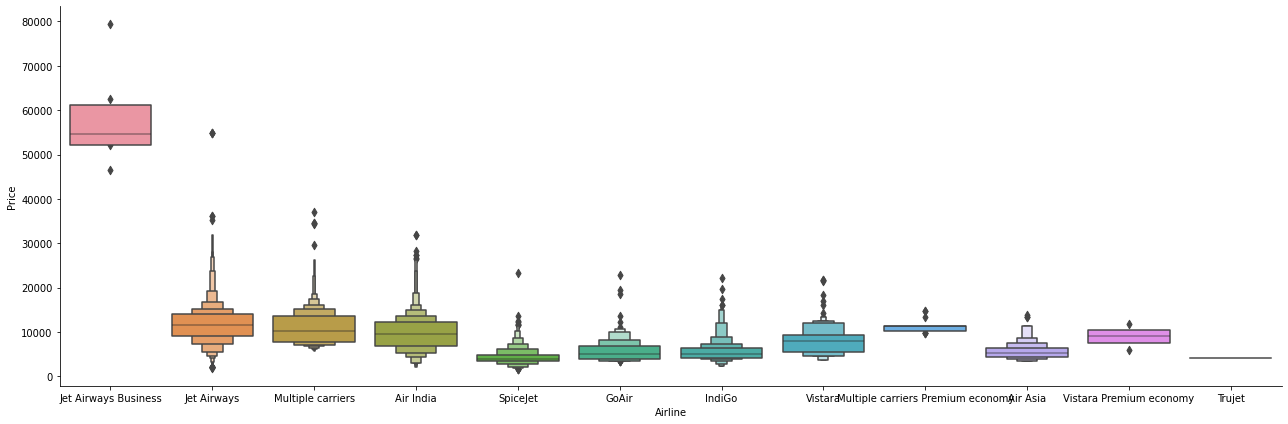

In [13]:
#Let see the relation between airline and price
sns.catplot(y='Price',x='Airline',data=df.sort_values('Price',ascending=False),kind='boxen',height=6,aspect=3)
plt.show() 

# Jet Airways Business has a highest Price.

In [14]:
df['Source'].value_counts()

Delhi       4537
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

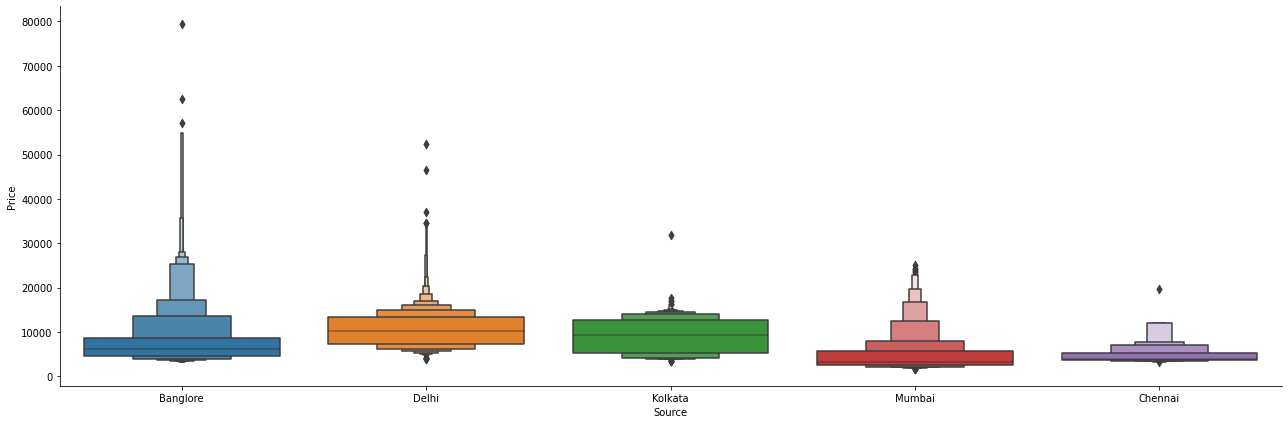

In [15]:
#Finding the relation between source and price
sns.catplot(y='Price',x='Source',data=df.sort_values('Price',ascending=False),kind='boxen',height=6,aspect=3)
plt.show()

In [16]:
#checking the destination
df['Destination'].value_counts()

Cochin       4537
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

# Doing same for destination

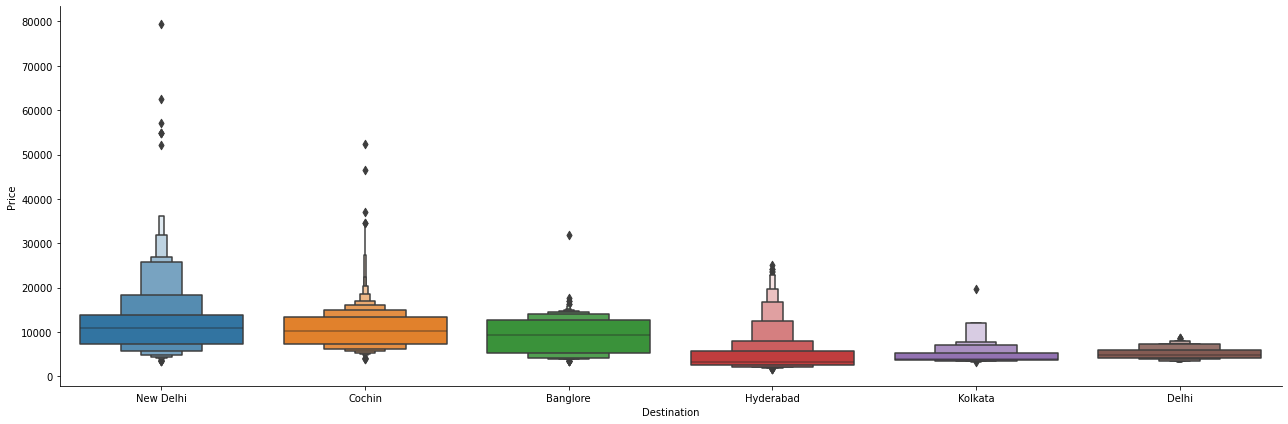

In [17]:
sns.catplot(y='Price',x='Destination',data=df.sort_values('Price',ascending=False),kind='boxen',height=6,aspect=3)
plt.show()

# Feature Engginering

In [18]:
total_df['Date']=total_df['Date_of_Journey'].str.split('/').str[0]
total_df['Month']=total_df['Date_of_Journey'].str.split('/').str[1]
total_df['Year']=total_df['Date_of_Journey'].str.split('/').str[2]

In [19]:
total_df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0,24,03,2019
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0,1,05,2019
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0,9,06,2019
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0,12,05,2019
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0,01,03,2019


In [20]:
total_df=total_df.drop(['Date_of_Journey'],axis=1)

In [21]:
total_df.dtypes

Airline             object
Source              object
Destination         object
Route               object
Dep_Time            object
Arrival_Time        object
Duration            object
Total_Stops         object
Additional_Info     object
Price              float64
Date                object
Month               object
Year                object
dtype: object

In [22]:
total_df['Date']=total_df['Date'].astype(int)
total_df['Month']=total_df['Month'].astype(int)
total_df['Year']=total_df['Year'].astype(int)

In [23]:
total_df.dtypes

Airline             object
Source              object
Destination         object
Route               object
Dep_Time            object
Arrival_Time        object
Duration            object
Total_Stops         object
Additional_Info     object
Price              float64
Date                 int64
Month                int64
Year                 int64
dtype: object

In [24]:
total_df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0,24,3,2019
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0,1,5,2019
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0,9,6,2019
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0,12,5,2019
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0,1,3,2019


# Lets see if additional info has any effect on price

In [25]:
total_df['Additional_Info'].value_counts()

No info                         10493
In-flight meal not included      2426
No check-in baggage included      396
1 Long layover                     20
Change airports                     8
Business class                      5
No Info                             3
1 Short layover                     1
2 Long layover                      1
Red-eye flight                      1
Name: Additional_Info, dtype: int64

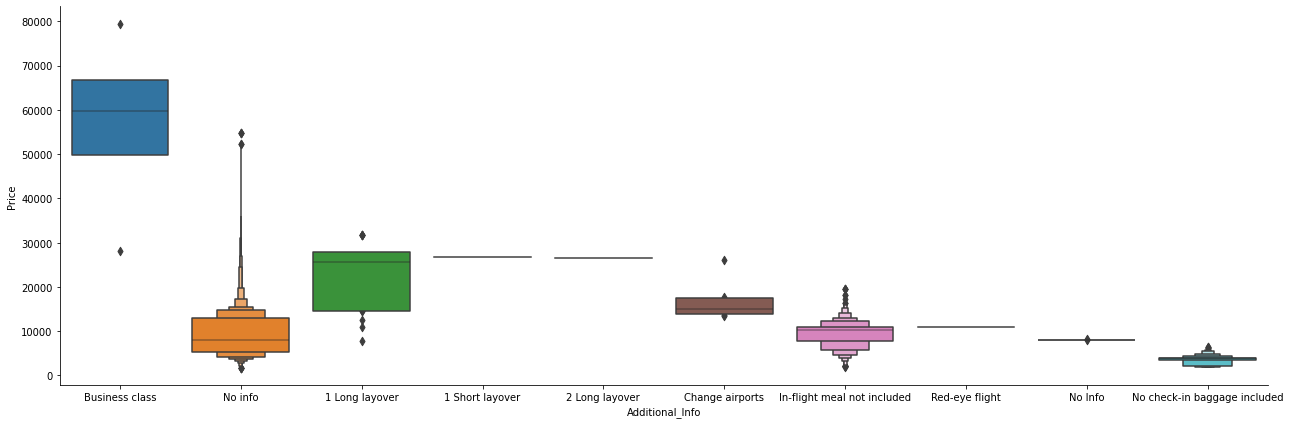

In [26]:
sns.catplot(y='Price',x='Additional_Info',data=df.sort_values('Price',ascending=False),kind='boxen',height=6,aspect=3)
plt.show()

# Filtering the arrival time

In [27]:
total_df['Arrival_Time']=total_df['Arrival_Time'].str.split(' ').str[0]

In [28]:
total_df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10,2h 50m,non-stop,No info,3897.0,24,3,2019
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0,1,5,2019
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25,19h,2 stops,No info,13882.0,9,6,2019
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0,12,5,2019
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0,1,3,2019


# Lets analyse stop columns

In [29]:
total_df['Total_Stops'].value_counts()

1 stop      7056
non-stop    4340
2 stops     1899
3 stops       56
4 stops        2
Name: Total_Stops, dtype: int64

In [30]:
total_df['Total_Stops']=total_df['Total_Stops'].fillna('1 stop')

In [31]:
total_df['Total_Stops'].isnull().sum()

0

# Lets us make stop column numeric

In [32]:
total_df['Total_Stops']=total_df['Total_Stops'].replace('non-stop','0 stop')

In [33]:
total_df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10,2h 50m,0 stop,No info,3897.0,24,3,2019
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0,1,5,2019
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25,19h,2 stops,No info,13882.0,9,6,2019
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0,12,5,2019
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0,1,3,2019


In [34]:
total_df['Stops']=total_df['Total_Stops'].str.split(' ').str[0]

In [35]:
total_df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Stops
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10,2h 50m,0 stop,No info,3897.0,24,3,2019,0
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0,1,5,2019,2
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25,19h,2 stops,No info,13882.0,9,6,2019,2
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0,12,5,2019,1
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0,1,3,2019,1


In [36]:
total_df=total_df.drop(['Total_Stops'],axis=1)

In [37]:
total_df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Additional_Info,Price,Date,Month,Year,Stops
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10,2h 50m,No info,3897.0,24,3,2019,0
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,No info,7662.0,1,5,2019,2
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25,19h,No info,13882.0,9,6,2019,2
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,No info,6218.0,12,5,2019,1
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,No info,13302.0,1,3,2019,1


In [38]:
total_df.dtypes

Airline             object
Source              object
Destination         object
Route               object
Dep_Time            object
Arrival_Time        object
Duration            object
Additional_Info     object
Price              float64
Date                 int64
Month                int64
Year                 int64
Stops               object
dtype: object

In [39]:
total_df['Stops']=total_df['Stops'].astype(int)

# Similary we will try to convert all the features to numeric variable

In [40]:
total_df['Arrival_Hour']=total_df['Arrival_Time'].str.split(':').str[0]
total_df['Arrival_Minute']=total_df['Arrival_Time'].str.split(':').str[1]

In [41]:
total_df['Arrival_Hour']=total_df['Arrival_Hour'].astype(int)
total_df['Arrival_Minute']=total_df['Arrival_Minute'].astype(int)

In [42]:
total_df=total_df.drop(['Arrival_Time'],axis=1)

In [43]:
total_df.head()

,Airline,Source,Destination,Route,Dep_Time,Duration,Additional_Info,Price,Date,Month,Year,Stops,Arrival_Hour,Arrival_Minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,2h 50m,No info,3897.0,24,3,2019,0,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,7h 25m,No info,7662.0,1,5,2019,2,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,19h,No info,13882.0,9,6,2019,2,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,5h 25m,No info,6218.0,12,5,2019,1,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,4h 45m,No info,13302.0,1,3,2019,1,21,35


In [44]:
total_df['Departure_Hour']=total_df['Dep_Time'].str.split(':').str[0]
total_df['Departure_Minute']=total_df['Dep_Time'].str.split(':').str[1]

In [45]:
total_df['Departure_Hour']=total_df['Departure_Hour'].astype(int)
total_df['Departure_Minute']=total_df['Departure_Minute'].astype(int)
total_df=total_df.drop(['Dep_Time'],axis=1)

In [46]:
total_df.head()

,Airline,Source,Destination,Route,Duration,Additional_Info,Price,Date,Month,Year,Stops,Arrival_Hour,Arrival_Minute,Departure_Hour,Departure_Minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,No info,3897.0,24,3,2019,0,1,10,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,No info,7662.0,1,5,2019,2,13,15,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,No info,13882.0,9,6,2019,2,4,25,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,No info,6218.0,12,5,2019,1,23,30,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,No info,13302.0,1,3,2019,1,21,35,16,50


# Lets Devide the route in different columns

In [47]:
total_df['Route_1']=total_df['Route'].str.split(' ').str[0]
total_df['Route_2']=total_df['Route'].str.split(' ').str[1]
total_df['Route_3']=total_df['Route'].str.split(' ').str[2]
total_df['Route_4']=total_df['Route'].str.split(' ').str[3]
total_df['Route_5']=total_df['Route'].str.split(' ').str[4]

In [48]:
total_df['Route_1'].fillna('None',inplace=True)
total_df['Route_2'].fillna('None',inplace=True)
total_df['Route_3'].fillna('None',inplace=True)
total_df['Route_4'].fillna('None',inplace=True)
total_df['Route_5'].fillna('None',inplace=True)

In [49]:
total_df.drop(['Route'],axis=1)


,Airline,Source,Destination,Duration,Additional_Info,Price,Date,Month,Year,Stops,Arrival_Hour,Arrival_Minute,Departure_Hour,Departure_Minute,Route_1,Route_2,Route_3,Route_4,Route_5
0,IndiGo,Banglore,New Delhi,2h 50m,No info,3897.0,24,3,2019,0,1,10,22,20,BLR,→,DEL,None,None
1,Air India,Kolkata,Banglore,7h 25m,No info,7662.0,1,5,2019,2,13,15,5,50,CCU,→,IXR,→,BBI
2,Jet Airways,Delhi,Cochin,19h,No info,13882.0,9,6,2019,2,4,25,9,25,DEL,→,LKO,→,BOM
3,IndiGo,Kolkata,Banglore,5h 25m,No info,6218.0,12,5,2019,1,23,30,18,5,CCU,→,NAG,→,BLR
4,IndiGo,Banglore,New Delhi,4h 45m,No info,13302.0,1,3,2019,1,21,35,16,50,BLR,→,NAG,→,DEL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2666,Air India,Kolkata,Banglore,23h 55m,No info,NaN,6,6,2019,1,20,25,20,30,CCU,→,DEL,→,BLR
2667,IndiGo,Kolkata,Banglore,2h 35m,No info,NaN,27,3,2019,0,16,55,14,20,CCU,→,BLR,None,None
2668,Jet Airways,Delhi,Cochin,6h 35m,No info,NaN,6,3,2019,1,4,25,21,50,DEL,→,BOM,→,COK
2669,Air India,Delhi,Cochin,15h 15m,No info,NaN,6,3,2019,1,19,15,4,0,DEL,→,BOM,→,COK


In [50]:
total_df.drop(['Duration'],axis=1)

,Airline,Source,Destination,Route,Additional_Info,Price,Date,Month,Year,Stops,Arrival_Hour,Arrival_Minute,Departure_Hour,Departure_Minute,Route_1,Route_2,Route_3,Route_4,Route_5
0,IndiGo,Banglore,New Delhi,BLR → DEL,No info,3897.0,24,3,2019,0,1,10,22,20,BLR,→,DEL,None,None
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,No info,7662.0,1,5,2019,2,13,15,5,50,CCU,→,IXR,→,BBI
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,No info,13882.0,9,6,2019,2,4,25,9,25,DEL,→,LKO,→,BOM
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,No info,6218.0,12,5,2019,1,23,30,18,5,CCU,→,NAG,→,BLR
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,No info,13302.0,1,3,2019,1,21,35,16,50,BLR,→,NAG,→,DEL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2666,Air India,Kolkata,Banglore,CCU → DEL → BLR,No info,NaN,6,6,2019,1,20,25,20,30,CCU,→,DEL,→,BLR
2667,IndiGo,Kolkata,Banglore,CCU → BLR,No info,NaN,27,3,2019,0,16,55,14,20,CCU,→,BLR,None,None
2668,Jet Airways,Delhi,Cochin,DEL → BOM → COK,No info,NaN,6,3,2019,1,4,25,21,50,DEL,→,BOM,→,COK
2669,Air India,Delhi,Cochin,DEL → BOM → COK,No info,NaN,6,3,2019,1,19,15,4,0,DEL,→,BOM,→,COK


In [51]:
total_df.isnull().sum()

Airline                0
Source                 0
Destination            0
Route                  1
Duration               0
Additional_Info        0
Price               2671
Date                   0
Month                  0
Year                   0
Stops                  0
Arrival_Hour           0
Arrival_Minute         0
Departure_Hour         0
Departure_Minute       0
Route_1                0
Route_2                0
Route_3                0
Route_4                0
Route_5                0
dtype: int64

# We will deal with Price

In [52]:
total_df['Price'].fillna((total_df['Price'].mean()),inplace=True)

In [53]:
total_df.isnull().sum()

Airline             0
Source              0
Destination         0
Route               1
Duration            0
Additional_Info     0
Price               0
Date                0
Month               0
Year                0
Stops               0
Arrival_Hour        0
Arrival_Minute      0
Departure_Hour      0
Departure_Minute    0
Route_1             0
Route_2             0
Route_3             0
Route_4             0
Route_5             0
dtype: int64

In [54]:
total_df.head()

,Airline,Source,Destination,Route,Duration,Additional_Info,Price,Date,Month,Year,Stops,Arrival_Hour,Arrival_Minute,Departure_Hour,Departure_Minute,Route_1,Route_2,Route_3,Route_4,Route_5
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,No info,3897.0,24,3,2019,0,1,10,22,20,BLR,→,DEL,None,None
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,No info,7662.0,1,5,2019,2,13,15,5,50,CCU,→,IXR,→,BBI
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,No info,13882.0,9,6,2019,2,4,25,9,25,DEL,→,LKO,→,BOM
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,No info,6218.0,12,5,2019,1,23,30,18,5,CCU,→,NAG,→,BLR
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,No info,13302.0,1,3,2019,1,21,35,16,50,BLR,→,NAG,→,DEL


# Lets us now convert all these variable in the form our model can understand,here we will use label encoder

In [55]:
from sklearn.preprocessing import LabelEncoder

In [56]:
le=LabelEncoder()

In [57]:
total_df['Airline']=le.fit_transform(total_df['Airline'])

In [58]:
total_df['Source']=le.fit_transform(total_df['Source'])

In [59]:
total_df['Destination']=le.fit_transform(total_df['Destination'])

In [60]:
total_df['Additional_Info']=le.fit_transform(total_df['Additional_Info'])

In [61]:
total_df['Route_1']=le.fit_transform(total_df['Route_1'])

In [62]:
total_df['Route_2']=le.fit_transform(total_df['Route_2'])

In [63]:
total_df['Route_3']=le.fit_transform(total_df['Route_3'])

In [64]:
total_df['Route_4']=le.fit_transform(total_df['Route_4'])

In [65]:
total_df['Route_5']=le.fit_transform(total_df['Route_5'])

In [66]:
total_df.head()

,Airline,Source,Destination,Route,Duration,Additional_Info,Price,Date,Month,Year,Stops,Arrival_Hour,Arrival_Minute,Departure_Hour,Departure_Minute,Route_1,Route_2,Route_3,Route_4,Route_5
0,3,0,5,BLR → DEL,2h 50m,8,3897.0,24,3,2019,0,1,10,22,20,0,1,10,0,21
1,1,3,0,CCU → IXR → BBI → BLR,7h 25m,8,7662.0,1,5,2019,2,13,15,5,50,2,1,20,1,1
2,4,2,1,DEL → LKO → BOM → COK,19h,8,13882.0,9,6,2019,2,4,25,9,25,3,1,27,1,4
3,3,3,0,CCU → NAG → BLR,5h 25m,8,6218.0,12,5,2019,1,23,30,18,5,2,1,29,1,3
4,3,0,5,BLR → NAG → DEL,4h 45m,8,13302.0,1,3,2019,1,21,35,16,50,0,1,29,1,7


In [67]:
total_df.drop(['Route','Duration'],axis=1,inplace=True)

In [68]:
total_df.head()

,Airline,Source,Destination,Additional_Info,Price,Date,Month,Year,Stops,Arrival_Hour,Arrival_Minute,Departure_Hour,Departure_Minute,Route_1,Route_2,Route_3,Route_4,Route_5
0,3,0,5,8,3897.0,24,3,2019,0,1,10,22,20,0,1,10,0,21
1,1,3,0,8,7662.0,1,5,2019,2,13,15,5,50,2,1,20,1,1
2,4,2,1,8,13882.0,9,6,2019,2,4,25,9,25,3,1,27,1,4
3,3,3,0,8,6218.0,12,5,2019,1,23,30,18,5,2,1,29,1,3
4,3,0,5,8,13302.0,1,3,2019,1,21,35,16,50,0,1,29,1,7


In [69]:
total_df.drop(['Year'],axis=1,inplace=True)

# Feature selection

In [70]:
x=total_df.drop(['Price'],axis=1)
y=total_df['Price']

In [71]:
x.head()

,Airline,Source,Destination,Additional_Info,Date,Month,Stops,Arrival_Hour,Arrival_Minute,Departure_Hour,Departure_Minute,Route_1,Route_2,Route_3,Route_4,Route_5
0,3,0,5,8,24,3,0,1,10,22,20,0,1,10,0,21
1,1,3,0,8,1,5,2,13,15,5,50,2,1,20,1,1
2,4,2,1,8,9,6,2,4,25,9,25,3,1,27,1,4
3,3,3,0,8,12,5,1,23,30,18,5,2,1,29,1,3
4,3,0,5,8,1,3,1,21,35,16,50,0,1,29,1,7


In [72]:
y.head()

0     3897.0
1     7662.0
2    13882.0
3     6218.0
4    13302.0
Name: Price, dtype: float64

In [73]:
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

In [74]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0,test_size=0.3)

In [75]:
model=SelectFromModel(Lasso(alpha=0.005,random_state=0))

In [76]:
model.fit(x_train,y_train)

SelectFromModel(estimator=Lasso(alpha=0.005, random_state=0))

In [77]:
model.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True])

In [78]:
selected_features=x_train.columns[(model.get_support())]

In [79]:
selected_features

Index(['Airline', 'Source', 'Destination', 'Additional_Info', 'Date', 'Month',
       'Stops', 'Arrival_Hour', 'Arrival_Minute', 'Departure_Hour',
       'Departure_Minute', 'Route_1', 'Route_2', 'Route_3', 'Route_4',
       'Route_5'],
      dtype='object')

In [80]:
#These are our selected features

In [81]:
from sklearn.ensemble import ExtraTreesRegressor

In [82]:
etr=ExtraTreesRegressor()
etr.fit(x_train,y_train)


ExtraTreesRegressor()

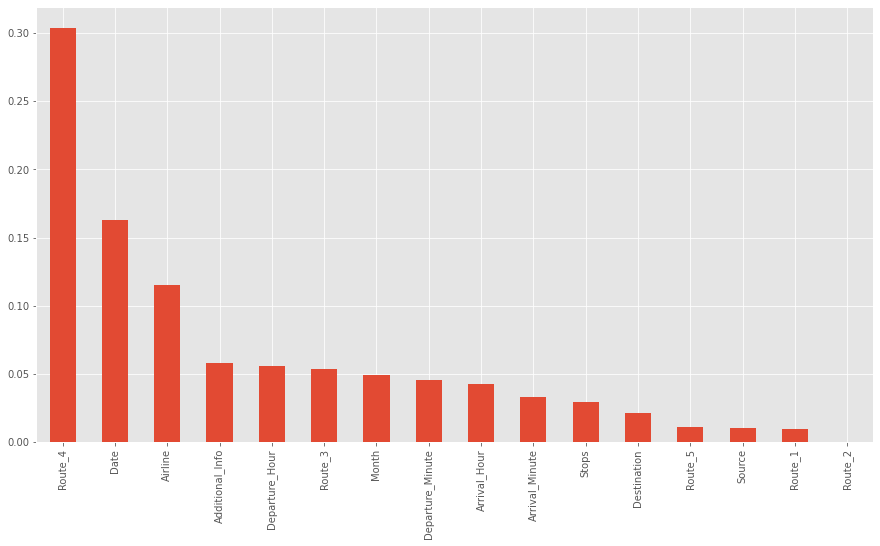

In [83]:
plt.style.use("ggplot")
plt.figure(figsize=(15,8))
feature_importances = pd.Series(etr.feature_importances_,index=x.columns)
feature_importances.nlargest(35).plot(kind='bar')
plt.show()

# Importing Our model

In [84]:
from sklearn.ensemble import RandomForestRegressor

In [85]:
reg_rf=RandomForestRegressor()
reg_rf.fit(x_train,y_train)

RandomForestRegressor()

In [86]:
y_pred=reg_rf.predict(x_test)

In [87]:
reg_rf.score(x_train,y_train)

0.9487293726219013

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


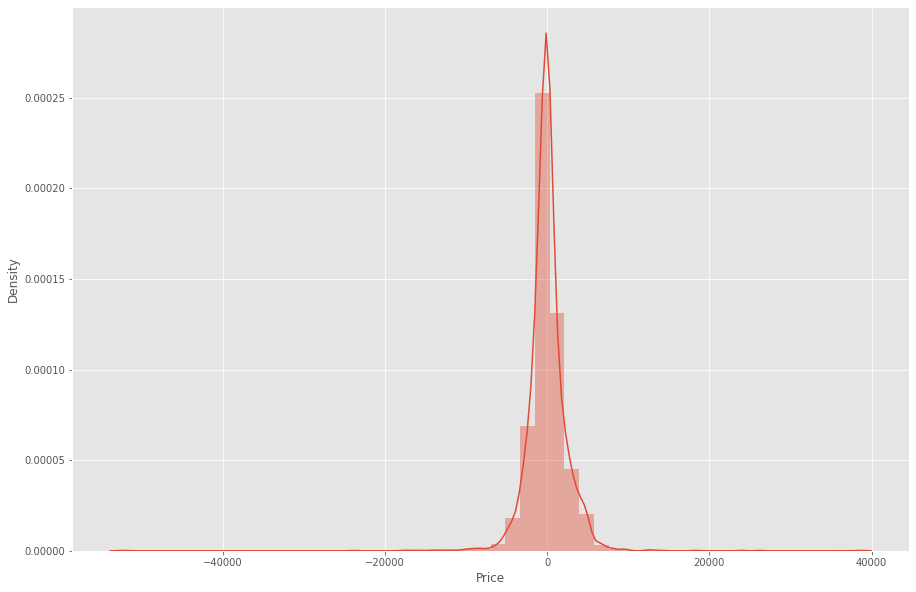

In [88]:
plt.style.use('ggplot')
plt.figure(figsize=(15,10))
sns.distplot(y_test-y_pred)
plt.show()

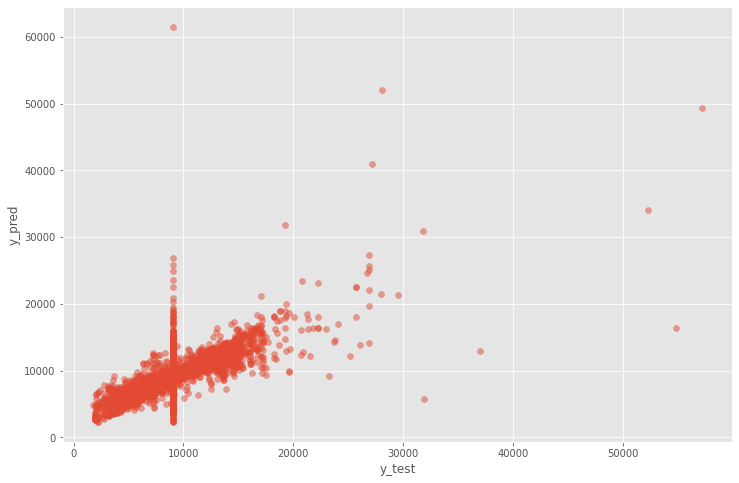

In [89]:
plt.figure(figsize=(12,8))
plt.style.use('ggplot')
plt.scatter(y_test,y_pred,alpha=0.5)
plt.xlabel('y_test')
plt.ylabel('y_pred')
plt.show()

In [90]:
from sklearn import metrics

In [91]:
print('MAE:',metrics.mean_absolute_error(y_test,y_pred))
print('MSE:',metrics.mean_squared_error(y_test,y_pred))
print('RSME:',np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

MAE: 1533.507076834695
MSE: 6529827.067528491
RSME: 2555.352630759303


In [92]:
metrics.r2_score(y_test,y_pred)

0.6072472563682807

# Hyperparameter tuning

In [93]:
from sklearn.model_selection import RandomizedSearchCV

In [94]:
#Number of trees in random forest
n_estimators = [int(x) for x in  np.linspace(start = 100 , stop = 1500, num = 15)]
#Number feature consider every split
max_features=['auto','sqrt']
#Maximum numbers level in trees
max_depth = [int(x) for x in np.linspace(5,30 ,num = 6)]
#Minimun number of samples required split a  node
min_samples_split = [2,3,5,7,10,15,100]
#Minimum number of samples requires at each leaf node
min_samples_leaf = [1,2,3,5,8,10]


In [95]:
param_grid={'n_estimators':n_estimators,
            'max_features':max_features,
            'max_depth':max_depth,
            'min_samples_split':min_samples_split,
            'min_samples_leaf':min_samples_leaf}

In [96]:
rf_random = RandomizedSearchCV(estimator=reg_rf,param_distributions=param_grid,scoring='neg_mean_squared_error',
                               n_iter = 50 , cv = 5 ,verbose=2 , random_state=42,n_jobs=3)

In [97]:
rf_random.fit(x_train,y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:705: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=50, n_jobs=3,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 3, 5, 8, 10],
                                        'min_samples_split': [2, 3, 5, 7, 10,
                                                              15, 100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100, 1200,
                                                         1300, 1400, 1500]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [98]:
rf_random.best_params_

{'max_depth': 15,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 3,
 'n_estimators': 700}

In [99]:
reg_rf=RandomForestRegressor(n_estimators=700,min_samples_leaf=1,min_samples_split=3,
                             max_features = 'sqrt',max_depth = 15)

In [100]:
reg_rf.fit(x_train,y_train)

RandomForestRegressor(max_depth=15, max_features='sqrt', min_samples_split=3,
                      n_estimators=700)

In [101]:
y_pred1=reg_rf.predict(x_test)


In [102]:
y_pred1

array([10233.90547338,  9018.46741453,  8471.84652652, ...,
        4411.10389868,  7970.76651003,  9984.94379978])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


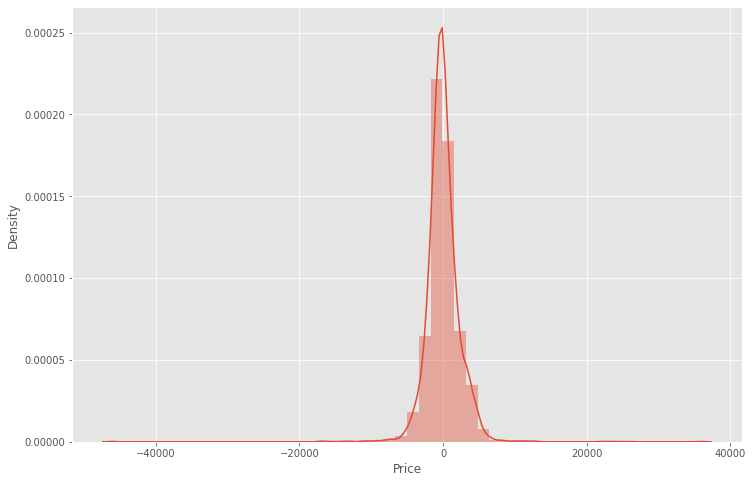

In [103]:
plt.style.use('ggplot')
plt.figure(figsize=(12,8))
sns.distplot(y_test-y_pred1)
plt.show()

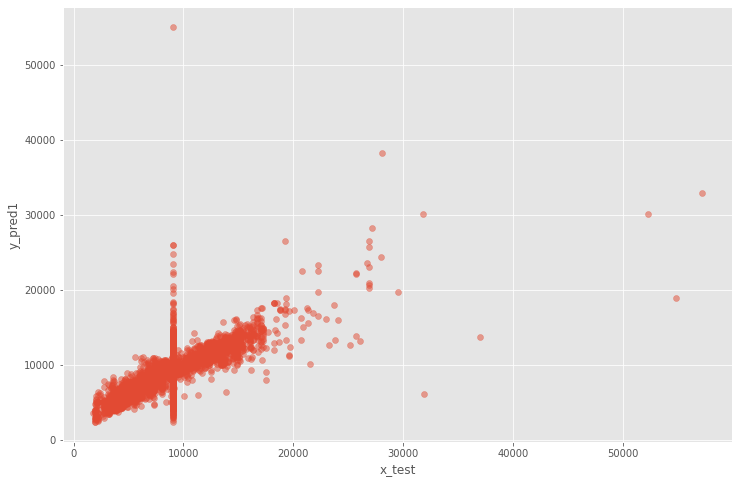

In [104]:
plt.figure(figsize=(12,8))
plt.style.use("ggplot")
plt.scatter(y_test,y_pred1,alpha=0.5)
plt.xlabel('x_test')
plt.ylabel('y_pred1')
plt.show()

In [105]:
metrics.r2_score(y_test,y_pred1)

0.63464783175081

# Using Auto Sklearn (Auto Ml)

# auto sklearn frees a machine learning user from algorithm selection and hyperparameter tuning.it levearages recent advantages in Bayesian optimization ,meta-learning and ensemble construction.

In [106]:
!apt-get install swig -y

Reading package lists... Done
Building dependency tree       
Reading state information... Done
swig is already the newest version (3.0.12-1).
0 upgraded, 0 newly installed, 0 to remove and 37 not upgraded.


In [107]:
!pip install cython numpy

In [108]:
!pip install auto-sklearn

In [109]:
import autosklearn

In [110]:
import autosklearn.regression as reg

In [111]:
df=pd.read_csv(r'/content/flight data.csv')

In [112]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [113]:
df1=pd.read_csv(r'/content/flight test.csv')

In [114]:
#we will use the same x_train and y_train data

In [115]:
x_train

,Airline,Source,Destination,Additional_Info,Date,Month,Stops,Arrival_Hour,Arrival_Minute,Departure_Hour,Departure_Minute,Route_1,Route_2,Route_3,Route_4,Route_5
8876,4,3,0,5,1,4,1,23,35,16,30,2,1,6,1,3
1443,4,3,0,8,9,5,1,4,40,18,55,2,1,6,1,3
8835,4,3,0,8,12,6,1,9,45,20,25,2,1,10,1,3
8572,6,2,1,8,27,6,1,21,0,10,0,3,1,6,1,6
981,3,3,0,8,15,6,0,14,5,11,30,2,1,5,0,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2440,1,3,0,8,21,5,2,1,20,9,25,2,1,6,1,6
3264,4,2,1,8,3,3,1,4,25,8,0,3,1,6,1,6
9845,4,2,1,5,18,5,1,12,35,11,30,3,1,6,1,6
116,4,0,5,8,18,3,1,18,25,8,0,0,1,6,1,7


In [116]:
autom = reg.AutoSklearnRegressor(time_left_for_this_task=120 , per_run_time_limit=30)

In [117]:
autom.fit(x_train,y_train)

AutoSklearnRegressor(per_run_time_limit=30, time_left_for_this_task=120)

In [118]:
print(autom.leaderboard())

          rank  ensemble_weight               type      cost   duration
model_id                                                               
4            1             0.54  gradient_boosting  0.306092   3.102930
2            2             0.12      random_forest  0.325688  12.496546
3            3             0.34  gradient_boosting  0.327479   5.262914


In [119]:
print(autom.show_models())

[(0.540000, SimpleRegressionPipeline({'data_preprocessor:__choice__': 'feature_type', 'feature_preprocessor:__choice__': 'no_preprocessing', 'regressor:__choice__': 'gradient_boosting', 'data_preprocessor:feature_type:categorical_transformer:categorical_encoding:__choice__': 'one_hot_encoding', 'data_preprocessor:feature_type:categorical_transformer:category_coalescence:__choice__': 'minority_coalescer', 'data_preprocessor:feature_type:numerical_transformer:imputation:strategy': 'median', 'data_preprocessor:feature_type:numerical_transformer:rescaling:__choice__': 'robust_scaler', 'regressor:gradient_boosting:early_stop': 'off', 'regressor:gradient_boosting:l2_regularization': 5.997418027353535e-10, 'regressor:gradient_boosting:learning_rate': 0.12286466971783992, 'regressor:gradient_boosting:loss': 'least_squares', 'regressor:gradient_boosting:max_bins': 255, 'regressor:gradient_boosting:max_depth': 'None', 'regressor:gradient_boosting:max_leaf_nodes': 26, 'regressor:gradient_boosting